# QF627 Pre-Course Workshop | Introduction to Programming
## Lesson 04 | An Introduction to `pandas` | `XZJ`view

> Let's learn `pandas`!

> `pandas` is one of the most powerful and popular tools in dealing with data within Python.

> In finance, familiarity with pandas is essential. 

> We will work with real-world datasets containing both string and numeric data, often structured around time series.

> You will learn effective data manipulation, analysis, and visualization techniques with pandas.

> First, you will learn

- how to open and read in a csv spreadsheet
- how to look at the data we have
- how to select columns
- how to do some simple math with them


In [1]:
!pip install pandas

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


> First we need to `import pandas as a library`. We import the library and then tell Python to refer to it as `pd`. By convention, it's imported as `pd` to save typing.

In [1]:
import pandas as pd

### Reading spreadsheets

> This is how you read a spreadsheet and assign it to an object. Reading in a CSV is just as easy as you'd guess.

In [2]:
our_data = pd.read_csv("2016_census_data.csv")

### Looking at your data

> To look at the data you just read into Python, you can just run a cell with the name of the variable:

> rows (data points; cases; observations) x columns (X, Y variables) = "rectangular form of data"

  - `data frame`
  - `data matrix`
  - `data table`

$$ Y = f(X) $$

- Y as a function of X
- X variables: input feature (ML); predictor (prediction); explanatory (explanation); independent
- Y variables: outplut (label; class); outcome (prediction); response (explanation); dependent

> Two different types of modeling
- Modeling for `Explanation` puts emphasis on x variables
- Modeling for `Prediction` puts emphasis on y variable (Supervised `Machine Learning`)

### workflow

> `collect` > `import` > `tidy` > `transform` > `visualize`

In [5]:
# -> `model` -> `for explanation` -> statistical inference
#                                 -> causal inference
#            -> `for prediction`  -> `machine learning`
#                                 -> `time-series forecasting`

In [3]:
our_data

,geoid,name,county,state,total_population,median_income,median_home_value,educational_attainment,white_alone,black_alone,native,asian,native_hawaiian_pacific_islander,some_other_race_alone,two_or_more,hispanic_or_latino
0,34003001000,Census Tract 10,Bergen County,New Jersey,6767,151641,680000,3045,5667,75,0,759,0,0,132,134
1,34003002100,Census Tract 21,Bergen County,New Jersey,1522,114545,2000001,836,788,141,0,444,0,0,27,122
2,34003002200,Census Tract 22,Bergen County,New Jersey,5389,90647,453800,1791,3481,99,9,1247,0,36,19,504
3,34003002300,Census Tract 23,Bergen County,New Jersey,5828,112031,610000,2363,3595,89,37,1627,0,0,32,448
4,34003003100,Census Tract 31,Bergen County,New Jersey,4946,76906,301900,1588,1803,306,0,1435,0,13,24,1365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4695,42103950701,Census Tract 9507.01,Pike County,Pennsylvania,4107,61726,155800,537,3665,12,0,67,0,0,26,337
4696,42103950702,Census Tract 9507.02,Pike County,Pennsylvania,3119,59239,151100,405,2908,44,0,60,0,0,19,88
4697,42103950801,Census Tract 9508.01,Pike County,Pennsylvania,4403,55530,120000,718,2777,705,0,53,0,0,97,771
4698,42103950802,Census Tract 9508.02,Pike County,Pennsylvania,6004,50724,146700,795,3072,970,20,44,0,0,11,1887


> Oops, that's a little long. Maybe we just want to see the first 10 rows:

In [6]:
our_data.head(10)

,geoid,name,county,state,total_population,median_income,median_home_value,educational_attainment,white_alone,black_alone,native,asian,native_hawaiian_pacific_islander,some_other_race_alone,two_or_more,hispanic_or_latino
0,34003001000,Census Tract 10,Bergen County,New Jersey,6767,151641,680000,3045,5667,75,0,759,0,0,132,134
1,34003002100,Census Tract 21,Bergen County,New Jersey,1522,114545,2000001,836,788,141,0,444,0,0,27,122
2,34003002200,Census Tract 22,Bergen County,New Jersey,5389,90647,453800,1791,3481,99,9,1247,0,36,19,504
3,34003002300,Census Tract 23,Bergen County,New Jersey,5828,112031,610000,2363,3595,89,37,1627,0,0,32,448
4,34003003100,Census Tract 31,Bergen County,New Jersey,4946,76906,301900,1588,1803,306,0,1435,0,13,24,1365
5,34003003200,Census Tract 32,Bergen County,New Jersey,5044,69531,322400,1417,1342,186,19,1882,0,6,64,1564
6,34003003300,Census Tract 33,Bergen County,New Jersey,6638,97957,328100,1737,2437,400,0,2131,0,0,148,1522
7,34003003401,Census Tract 34.01,Bergen County,New Jersey,2958,122650,385200,941,1704,109,0,520,0,0,36,589
8,34003003402,Census Tract 34.02,Bergen County,New Jersey,3827,105776,356100,1237,1937,260,0,733,0,4,122,771
9,34003003500,Census Tract 35,Bergen County,New Jersey,4100,52382,340200,891,886,502,16,1160,0,0,59,1493


> Or you might want to look at `the last five`:

In [7]:
our_data.tail(5)

,geoid,name,county,state,total_population,median_income,median_home_value,educational_attainment,white_alone,black_alone,native,asian,native_hawaiian_pacific_islander,some_other_race_alone,two_or_more,hispanic_or_latino
4695,42103950701,Census Tract 9507.01,Pike County,Pennsylvania,4107,61726,155800,537,3665,12,0,67,0,0,26,337
4696,42103950702,Census Tract 9507.02,Pike County,Pennsylvania,3119,59239,151100,405,2908,44,0,60,0,0,19,88
4697,42103950801,Census Tract 9508.01,Pike County,Pennsylvania,4403,55530,120000,718,2777,705,0,53,0,0,97,771
4698,42103950802,Census Tract 9508.02,Pike County,Pennsylvania,6004,50724,146700,795,3072,970,20,44,0,0,11,1887
4699,42103950900,Census Tract 9509,Pike County,Pennsylvania,4184,49453,146100,721,3888,55,29,22,0,0,9,181


> or you want to know the `length` of the entire set:

> this means that you will have `the number of data points (observations; rows)`

In [8]:
len(our_data)

4700

In [9]:
our_data.T # transpose

,0,1,2,3,4,5,6,7,8,9,...,4690,4691,4692,4693,4694,4695,4696,4697,4698,4699
geoid,34003001000,34003002100,34003002200,34003002300,34003003100,34003003200,34003003300,34003003401,34003003402,34003003500,...,42103950502,42103950601,42103950603,42103950605,42103950606,42103950701,42103950702,42103950801,42103950802,42103950900
name,Census Tract 10,Census Tract 21,Census Tract 22,Census Tract 23,Census Tract 31,Census Tract 32,Census Tract 33,Census Tract 34.01,Census Tract 34.02,Census Tract 35,...,Census Tract 9505.02,Census Tract 9506.01,Census Tract 9506.03,Census Tract 9506.05,Census Tract 9506.06,Census Tract 9507.01,Census Tract 9507.02,Census Tract 9508.01,Census Tract 9508.02,Census Tract 9509
county,Bergen County,Bergen County,Bergen County,Bergen County,Bergen County,Bergen County,Bergen County,Bergen County,Bergen County,Bergen County,...,Pike County,Pike County,Pike County,Pike County,Pike County,Pike County,Pike County,Pike County,Pike County,Pike County
state,New Jersey,New Jersey,New Jersey,New Jersey,New Jersey,New Jersey,New Jersey,New Jersey,New Jersey,New Jersey,...,Pennsylvania,Pennsylvania,Pennsylvania,Pennsylvania,Pennsylvania,Pennsylvania,Pennsylvania,Pennsylvania,Pennsylvania,Pennsylvania
total_population,6767,1522,5389,5828,4946,5044,6638,2958,3827,4100,...,3132,1560,1093,6056,5647,4107,3119,4403,6004,4184
median_income,151641,114545,90647,112031,76906,69531,97957,122650,105776,52382,...,57875,68319,56250,83220,86250,61726,59239,55530,50724,49453
median_home_value,680000,2000001,453800,610000,301900,322400,328100,385200,356100,340200,...,205300,269200,281400,207100,237300,155800,151100,120000,146700,146100
educational_attainment,3045,836,1791,2363,1588,1417,1737,941,1237,891,...,728,354,255,1048,1369,537,405,718,795,721
white_alone,5667,788,3481,3595,1803,1342,2437,1704,1937,886,...,2186,1404,1009,5487,4951,3665,2908,2777,3072,3888
black_alone,75,141,99,89,306,186,400,109,260,502,...,237,33,16,333,71,12,44,705,970,55


### Filtering by columns

> How about filtering your data by columns? This is how you can do that:

In [10]:
our_data["county"]

0        Bergen County
1        Bergen County
2        Bergen County
3        Bergen County
4        Bergen County
             ...      
4695       Pike County
4696       Pike County
4697       Pike County
4698       Pike County
4699       Pike County
Name: county, Length: 4700, dtype: object

In [11]:
our_data.county

0        Bergen County
1        Bergen County
2        Bergen County
3        Bergen County
4        Bergen County
             ...      
4695       Pike County
4696       Pike County
4697       Pike County
4698       Pike County
4699       Pike County
Name: county, Length: 4700, dtype: object

> Often, you might want to select multiple columns:

In [4]:
two_columns = our_data[["county", "asian"]] # 两个方括号！
two_columns

,county,asian
0,Bergen County,759
1,Bergen County,444
2,Bergen County,1247
3,Bergen County,1627
4,Bergen County,1435
...,...,...
4695,Pike County,67
4696,Pike County,60
4697,Pike County,53
4698,Pike County,44


In [14]:
reference_to_two_columns = ["county", "asian"]
two_columns_twins = our_data[reference_to_two_columns]

In [15]:
two_columns_twins == two_columns

,county,asian
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
...,...,...
4695,True,True
4696,True,True
4697,True,True
4698,True,True


### Doing simple math with your data
> There are a few nifty functions you can apply to your data columns. 

In [17]:
our_data["median_income"].sum()

-59651916985

In [5]:
our_data[["median_income", "total_population", "median_home_value"]].mean()

median_income       -1.269190e+07
total_population     4.262009e+03
median_home_value   -3.983366e+07
dtype: float64

In [19]:
our_data[["median_income", "total_population"]].median()

median_income       68944.5
total_population     4082.5
dtype: float64

> There is also this nifty function which gives you a `quick overview` of your data:

In [20]:
our_data["median_income"].describe() # important! 

count    4.700000e+03
mean    -1.269190e+07
std      9.138565e+07
min     -6.666667e+08
25%      4.652675e+04
50%      6.894450e+04
75%      9.595675e+04
max      2.500010e+05
Name: median_income, dtype: float64

### How to estimate your outliers

$$ LowerOutliers = Q_1 - 1.5 * IQR $$
$$ UpperOutliers = Q_3 - 1.5 * IQR $$

### Making new data columns
> You can make a new column based on two columns like so:

In [21]:
our_data.tail() # # gives you the last five rows, by default

,geoid,name,county,state,total_population,median_income,median_home_value,educational_attainment,white_alone,black_alone,native,asian,native_hawaiian_pacific_islander,some_other_race_alone,two_or_more,hispanic_or_latino
4695,42103950701,Census Tract 9507.01,Pike County,Pennsylvania,4107,61726,155800,537,3665,12,0,67,0,0,26,337
4696,42103950702,Census Tract 9507.02,Pike County,Pennsylvania,3119,59239,151100,405,2908,44,0,60,0,0,19,88
4697,42103950801,Census Tract 9508.01,Pike County,Pennsylvania,4403,55530,120000,718,2777,705,0,53,0,0,97,771
4698,42103950802,Census Tract 9508.02,Pike County,Pennsylvania,6004,50724,146700,795,3072,970,20,44,0,0,11,1887
4699,42103950900,Census Tract 9509,Pike County,Pennsylvania,4184,49453,146100,721,3888,55,29,22,0,0,9,181


In [23]:
our_data["asian"]/our_data["total_population"] == our_data.asian / our_data.total_population

0       True
1       True
2       True
3       True
4       True
        ... 
4695    True
4696    True
4697    True
4698    True
4699    True
Length: 4700, dtype: bool

> To overwrite your previous data you can just re-assign the column new values, the way you do with any variable: 

In [14]:
our_data["asian_percentage"] = our_data.asian / our_data.total_population * 100
our_data.head()

,geoid,name,county,state,total_population,median_income,median_home_value,educational_attainment,white_alone,black_alone,native,asian,native_hawaiian_pacific_islander,some_other_race_alone,two_or_more,hispanic_or_latino,asian_percentage
0,34003001000,Census Tract 10,Bergen County,New Jersey,6767,151641,680000,3045,5667,75,0,759,0,0,132,134,11.216196
1,34003002100,Census Tract 21,Bergen County,New Jersey,1522,114545,2000001,836,788,141,0,444,0,0,27,122,29.172142
2,34003002200,Census Tract 22,Bergen County,New Jersey,5389,90647,453800,1791,3481,99,9,1247,0,36,19,504,23.139729
3,34003002300,Census Tract 23,Bergen County,New Jersey,5828,112031,610000,2363,3595,89,37,1627,0,0,32,448,27.916953
4,34003003100,Census Tract 31,Bergen County,New Jersey,4946,76906,301900,1588,1803,306,0,1435,0,13,24,1365,29.013344


In [15]:
# 不好用，避免使用！
our_data.asian_percentage = our_data.asian/our_data.total_population * 100
our_data.head()

,geoid,name,county,state,total_population,median_income,median_home_value,educational_attainment,white_alone,black_alone,native,asian,native_hawaiian_pacific_islander,some_other_race_alone,two_or_more,hispanic_or_latino,asian_percentage
0,34003001000,Census Tract 10,Bergen County,New Jersey,6767,151641,680000,3045,5667,75,0,759,0,0,132,134,11.216196
1,34003002100,Census Tract 21,Bergen County,New Jersey,1522,114545,2000001,836,788,141,0,444,0,0,27,122,29.172142
2,34003002200,Census Tract 22,Bergen County,New Jersey,5389,90647,453800,1791,3481,99,9,1247,0,36,19,504,23.139729
3,34003002300,Census Tract 23,Bergen County,New Jersey,5828,112031,610000,2363,3595,89,37,1627,0,0,32,448,27.916953
4,34003003100,Census Tract 31,Bergen County,New Jersey,4946,76906,301900,1588,1803,306,0,1435,0,13,24,1365,29.013344


##### A quick sorting function can now help you find the spots with the highest or lowest black populations (we can go over this again next week):

In [27]:
our_data.sort_values(by = "asian_percentage") # in ascending order, by default

,geoid,name,county,state,total_population,median_income,median_home_value,educational_attainment,white_alone,black_alone,native,asian,native_hawaiian_pacific_islander,some_other_race_alone,two_or_more,hispanic_or_latino,asian_percentage
4233,36103134903,Census Tract 1349.03,Suffolk County,New York,1206,134583,535900,389,972,15,0,0,0,0,0,219,0.0
3634,36081051600,Census Tract 516,Queens County,New York,1854,59643,379900,324,16,1553,18,0,0,0,39,228,0.0
1178,34031181500,Census Tract 1815,Passaic County,New Jersey,2731,20434,166700,31,17,1748,0,0,0,0,30,936,0.0
3554,36081040000,Census Tract 400,Queens County,New York,1299,75238,399000,274,0,1197,0,0,0,0,29,73,0.0
3552,36081039800,Census Tract 398,Queens County,New York,1762,71953,411700,300,16,1609,0,0,0,0,50,87,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3960,36081990100,Census Tract 9901,Queens County,New York,0,-666666666,-666666666,0,0,0,0,0,0,0,0,0,NaN
4017,36085015400,Census Tract 154,Richmond County,New York,0,-666666666,-666666666,0,0,0,0,0,0,0,0,0,NaN
4070,36085990100,Census Tract 9901,Richmond County,New York,0,-666666666,-666666666,0,0,0,0,0,0,0,0,0,NaN
4458,36103990100,Census Tract 9901,Suffolk County,New York,0,-666666666,-666666666,0,0,0,0,0,0,0,0,0,NaN


In [28]:
our_data.sort_values(by = "asian_percentage", ascending = False) # will gives you descending order

,geoid,name,county,state,total_population,median_income,median_home_value,educational_attainment,white_alone,black_alone,native,asian,native_hawaiian_pacific_islander,some_other_race_alone,two_or_more,hispanic_or_latino,asian_percentage
3811,36081085300,Census Tract 853,Queens County,New York,4395,36546,409600,794,129,51,28,3933,0,0,66,188,89.488055
1944,36047012000,Census Tract 120,Kings County,New York,1305,50750,852300,96,73,0,0,1124,0,4,0,104,86.130268
3819,36081086900,Census Tract 869,Queens County,New York,2053,31154,459200,320,56,20,0,1743,0,0,8,226,84.900146
2912,36061000800,Census Tract 8,New York County,New York,9299,31129,545500,1553,756,90,15,7803,8,249,113,265,83.912249
3509,36081029300,Census Tract 293,Queens County,New York,1109,58304,658600,256,111,0,0,910,0,0,14,74,82.055906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3960,36081990100,Census Tract 9901,Queens County,New York,0,-666666666,-666666666,0,0,0,0,0,0,0,0,0,NaN
4017,36085015400,Census Tract 154,Richmond County,New York,0,-666666666,-666666666,0,0,0,0,0,0,0,0,0,NaN
4070,36085990100,Census Tract 9901,Richmond County,New York,0,-666666666,-666666666,0,0,0,0,0,0,0,0,0,NaN
4458,36103990100,Census Tract 9901,Suffolk County,New York,0,-666666666,-666666666,0,0,0,0,0,0,0,0,0,NaN


### Grouping your data results

In [20]:
our_data.groupby(["county"])["asian_percentage"].mean()

county
 Bergen County         16.034681
 Bronx County           3.771159
 Dutchess County        3.606760
 Essex County           4.111863
 Hudson County         14.618640
 Hunterdon County       3.430046
 Kings County          11.329430
 Middlesex County      22.100983
 Monmouth County        4.531849
 Morris County          9.912594
 Nassau County          8.552710
 New York County       12.392477
 Ocean County           1.742117
 Orange County          2.493452
 Passaic County         4.924141
 Pike County            1.056677
 Putnam County          2.030521
 Queens County         23.128775
 Richmond County        7.688357
 Rockland County        6.076602
 Somerset County       14.321779
 Suffolk County         3.667987
 Sussex County          1.992591
 Union County           4.456520
 Westchester County     5.685249
Name: asian_percentage, dtype: float64

In [21]:
our_data.groupby(["state"])["asian"].sum()

state
 New Jersey       687529
 New York        1421802
 Pennsylvania        627
Name: asian, dtype: int64

In [22]:
our_data.groupby(["state"]).agg({"asian": "sum"}) # agg好看多了！

,asian
state,
New Jersey,687529
New York,1421802
Pennsylvania,627


### A Quick Review on `matplotlib` and `pandas`

In [24]:
# import
population_data = pd.read_csv("countries.csv")
population_data

,country,year,population
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460
...,...,...,...
1699,Zimbabwe,1987,9216418
1700,Zimbabwe,1992,10704340
1701,Zimbabwe,1997,11404948
1702,Zimbabwe,2002,11926563


In [33]:
# transform

cross_table = pd.crosstab(index = population_data["country"], columns = "counts")
cross_table


col_0,counts
country,
Afghanistan,12
Albania,12
Algeria,12
Angola,12
Argentina,12
...,...
Vietnam,12
West Bank and Gaza,12
"Yemen, Rep.",12


In [34]:
Vietnam = population_data[population_data["country"] == "Vietnam"]
Vietnam

,country,year,population
1644,Vietnam,1952,26246839
1645,Vietnam,1957,28998543
1646,Vietnam,1962,33796140
1647,Vietnam,1967,39463910
1648,Vietnam,1972,44655014
1649,Vietnam,1977,50533506
1650,Vietnam,1982,56142181
1651,Vietnam,1987,62826491
1652,Vietnam,1992,69940728
1653,Vietnam,1997,76048996


In [37]:
China = population_data[population_data.country == "China"]
China

,country,year,population
288,China,1952,556263527
289,China,1957,637408000
290,China,1962,665770000
291,China,1967,754550000
292,China,1972,862030000
293,China,1977,943455000
294,China,1982,1000281000
295,China,1987,1084035000
296,China,1992,1164970000
297,China,1997,1230075000


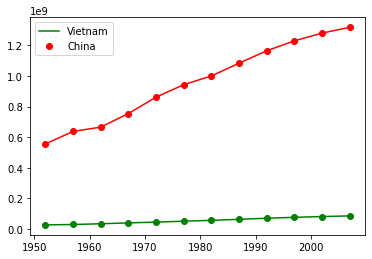

In [40]:
# visualize

import matplotlib.pyplot as plt

plt.plot(Vietnam.year, Vietnam.population, color = 'green', label = "Vietnam")
plt.plot(China.year, China.population, color = 'red')

plt.plot(Vietnam.year, Vietnam.population, "o", color = 'green')
plt.plot(China.year, China.population, "o", color = 'red', label = "China")

plt.legend()

plt.show()

In [45]:
China.population / China.population.iloc[0]

288    1.000000
289    1.145874
290    1.196861
291    1.356461
292    1.549679
293    1.696058
294    1.798214
295    1.948780
296    2.094277
297    2.211317
298    2.301787
299    2.370609
Name: population, dtype: float64

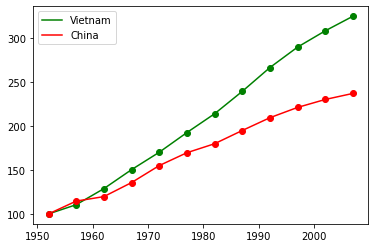

In [48]:
plt.plot(Vietnam.year, Vietnam.population / Vietnam.population.iloc[0] * 100, color = 'green', label = "Vietnam")
plt.plot(China.year, China.population / China.population.iloc[0] * 100, color = 'red', label = "China")

plt.plot(Vietnam.year, Vietnam.population / Vietnam.population.iloc[0] * 100, "o", color = 'green')
plt.plot(China.year, China.population / China.population.iloc[0] * 100, "o", color = 'red')

plt.legend()
plt.title("Your Title")
plt.show()

`Thank you for working with the script.`

In [ ]:
exit()